In [1]:
import pandas as pd
from statsmodels.regression.linear_model import OLS
import matplotlib.pyplot as plt

In [2]:
Rf = 0.0653

In [3]:
data = pd.read_csv('data/returns.csv')

instrs = ["OLAELEC","WHIRLPOOL","SAGILITY","RAMCOCEM","TATACHEM"]
Rm_Rf = data["INDEX"] - Rf
betas = {}

for instr in instrs:
    model = OLS(data[instr]-Rf, Rm_Rf).fit()
    betas[instr] = model.params[0]
    print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                OLAELEC   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                              887.9
Date:                Thu, 06 Nov 2025   Prob (F-statistic):                    4.66e-80
Time:                        21:41:23   Log-Likelihood:                          438.25
No. Observations:                 226   AIC:                                     -874.5
Df Residuals:                     225   BIC:                                     -871.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\adity\AppData\Local\Temp\ipykernel_25696\3397885016.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[instr] = model.params[0]
C:\Users\adity\AppData\Local\Temp\ipykernel_25696\3397885016.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[instr] = model.params[0]
C:\Users\adity\AppData\Local\Temp\ipykernel_25696\3397885016.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas[instr] = model.params[0]
C:\U

In [4]:
betas

{'OLAELEC': np.float64(1.0371715588693078),
 'WHIRLPOOL': np.float64(1.0148601370636217),
 'SAGILITY': np.float64(0.9706331880404016),
 'RAMCOCEM': np.float64(0.9781830490798163),
 'TATACHEM': np.float64(1.0040087472682122)}

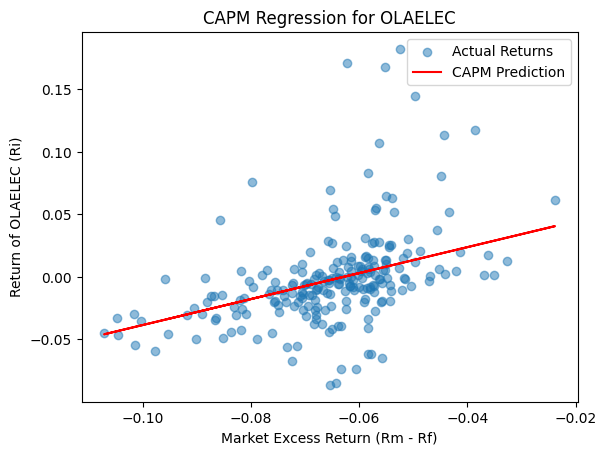

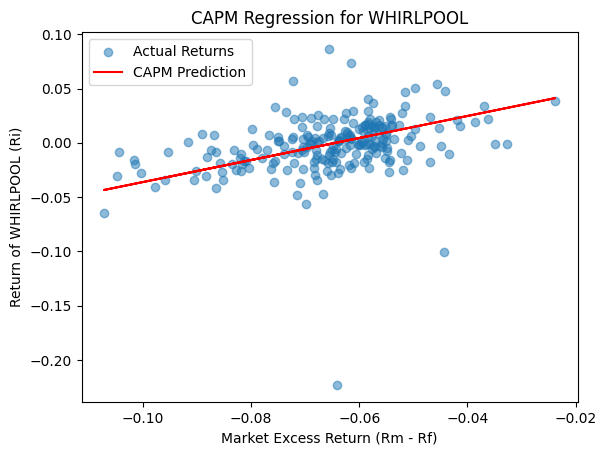

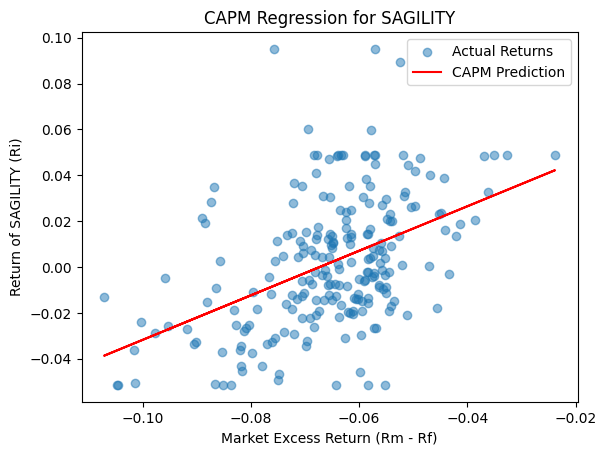

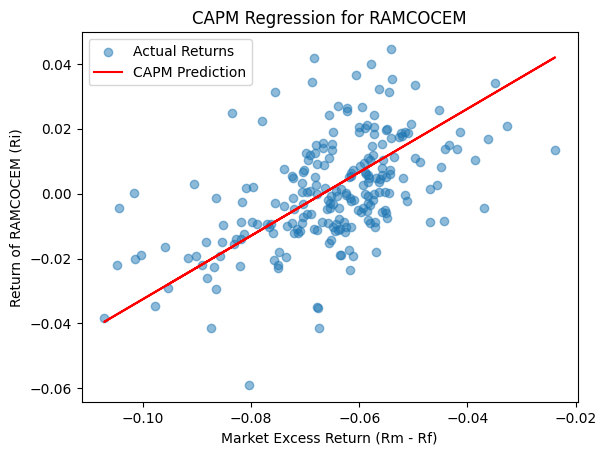

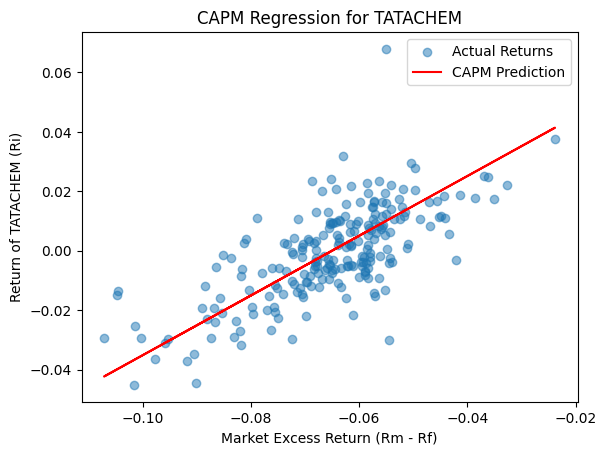

In [5]:
preds = {instr: Rf + betas[instr] * Rm_Rf for instr in instrs}
for instr in instrs:
    plt.scatter(Rm_Rf, data[instr], label='Actual Returns', alpha=0.5)
    plt.plot(Rm_Rf, preds[instr], color='red', label='CAPM Prediction')
    plt.title(f'CAPM Regression for {instr}')
    plt.xlabel('Market Excess Return (Rm - Rf)')
    plt.ylabel(f'Return of {instr} (Ri)')
    plt.legend()
    plt.show()